                                            Iris Classification Model

### Prediction or Interpretation
- This model will be focussed on Prediction rather Interpretaion
- Model will have more explanation over the model prediction performance using performance metrics


In [15]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
# will import regression models later while building it

In [16]:
# importing iris dataset and creating dataframe

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Dataset Description and Attributes summary

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [18]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- Dataset has 4 features - all are dimensions of a flower(outer layer - sepal, inner layer - Petal)
- sepal length - length of the outer layer of the petal
- sepal width - width of the outer layer of the petal
- petal length - length of the inner layer of the flower
- petal width - width of the inner layer of the flower
- all features has float values
- Our aim is to find out the flower category with given features

### Data Cleaning

In [20]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

This dataset is pretty clean. Since our concern is on the model performance we dive into the next section.

### Feature Engineering

Determine if the floating point values need to be scaled

In [24]:
df.dtypes.tail()

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

The data are all scaled from -1.0  to 1.0 

Feature Correlation

In [ ]:
np.round(df.corr(),2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


In [25]:
feature_cols = df.columns[:]
corr_values = df[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values

,feature1,feature2,correlation,abs_correlation
0,sepal length (cm),sepal width (cm),-0.117570,0.117570
1,sepal length (cm),petal length (cm),0.871754,0.871754
2,sepal length (cm),petal width (cm),0.817941,0.817941
3,sepal width (cm),petal length (cm),-0.428440,0.428440
4,sepal width (cm),petal width (cm),-0.366126,0.366126
5,petal length (cm),petal width (cm),0.962865,0.962865


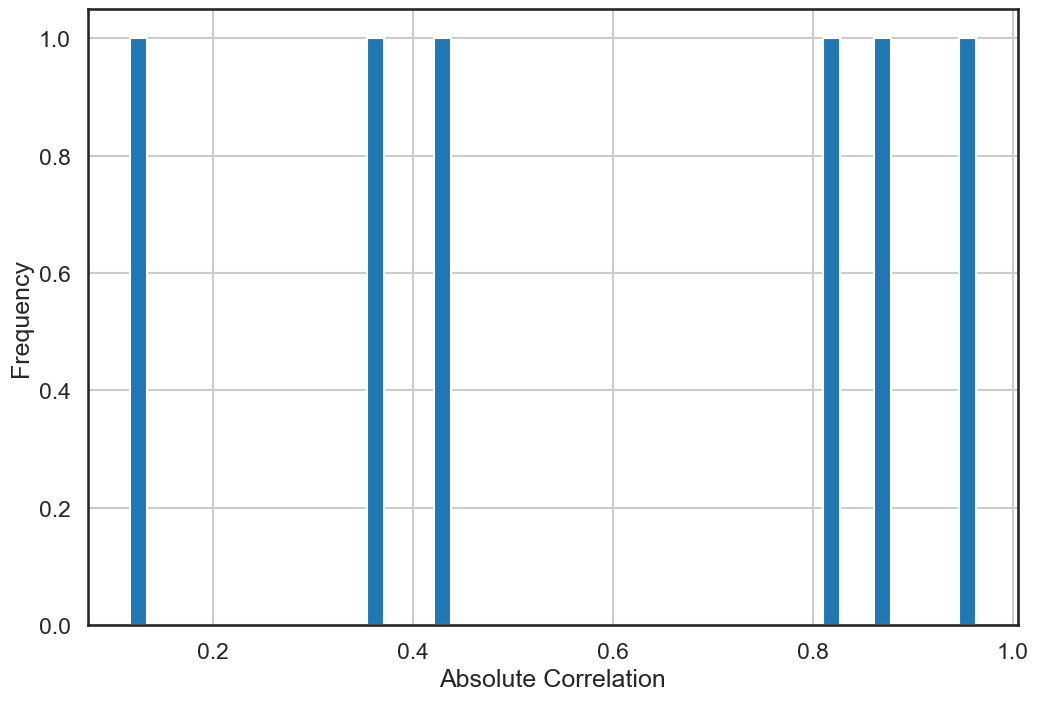

In [30]:
# Histogram representation of correlation
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [29]:
# the most correlated features
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
5,petal length (cm),petal width (cm),0.962865,0.962865
1,sepal length (cm),petal length (cm),0.871754,0.871754
2,sepal length (cm),petal width (cm),0.817941,0.817941


### Model Creation

Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, random_state=10, train_size=0.8)

Stock Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
stockmodel = LogisticRegression()
stockmodel.fit(xtrain, ytrain)
stockypred = stockmodel.predict(xtest)

SVM Classifier

In [39]:
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(xtrain, ytrain)
svcypred = svcmodel.predict(xtest)

Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain, ytrain)
rfypred = rfmodel.predict(xtest)

### Best Model

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score

Stock LR

In [61]:
precision, recall, fscore, _ = score(stockypred, ytest)
print('Stock LR')
print('Accuracy', accuracy_score(ytest, stockypred))
print('Precision : {}, Recall : {}, fscore : {}'.format(precision, recall, fscore))

Stock LR
Accuracy 1.0
Precision : [1. 1. 1.], Recall : [1. 1. 1.], fscore : [1. 1. 1.]


SVM Classifier

In [62]:
precision, recall, fscore, _ = score(svcypred, ytest)
print('SVM')
print('Accuracy', accuracy_score(ytest, svcypred))
print('Precision : {}, Recall : {}, fscore : {}'.format(precision, recall, fscore))

SVM
Accuracy 0.9666666666666667
Precision : [1.         0.92307692 1.        ], Recall : [1.    1.    0.875], fscore : [1.         0.96       0.93333333]


Random Forest Claasifier

In [63]:
precision, recall, fscore, _ = score(rfypred, ytest)
print('Random Forest')
print('Accuracy', accuracy_score(ytest, rfypred))
print('Precision : {}, Recall : {}, fscore : {}'.format(precision, recall, fscore))

Random Forest
Accuracy 0.9666666666666667
Precision : [1.         0.92307692 1.        ], Recall : [1.    1.    0.875], fscore : [1.         0.96       0.93333333]


### Insights on my models

- According to my dataset Stock LR performs the best with maximum accuracy, precision and fscore
- On the other hand SVM and Random Forest score same scores

### Next Step Analysis

- Since the dataset is so simple we can achive good performance with slight tunning.
- Going forward will try this techniques in larger complex dataset and record the performance




-------------------------------------------------------------- Thank you by Shankesh Raju MS----------------------------------------------------------------------